In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
def format_ticket(col_val):
    values = col_val.split(" ")
    if values[0] == "LINE":
        values[0] = 0
    return values[0] if len(values) == 1 else values[-1]

In [51]:
# Check if ticket starts with 1
train["Ticket"] = train["Ticket"].apply(format_ticket)
test["Ticket"] = test["Ticket"].apply(format_ticket)

In [52]:
train[["Pclass", "Ticket"]]

,Pclass,Ticket
0,3,21171
1,1,17599
2,3,3101282
3,1,113803
4,3,373450
...,...,...
886,2,211536
887,1,112053
888,3,6607
889,1,111369


<Axes: >

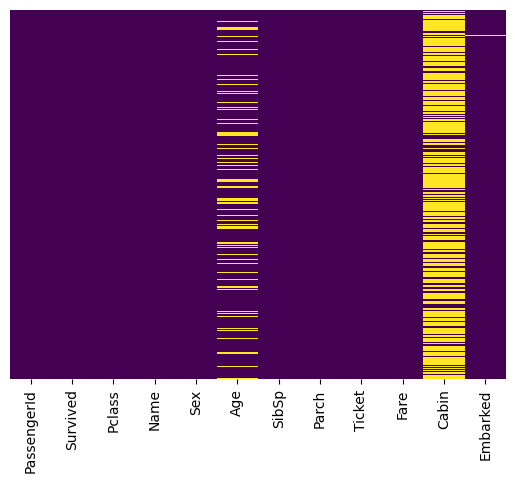

In [5]:
# Check which columns have null values
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [11]:
sns.set_style("whitegrid")

<Axes: xlabel='Survived', ylabel='count'>

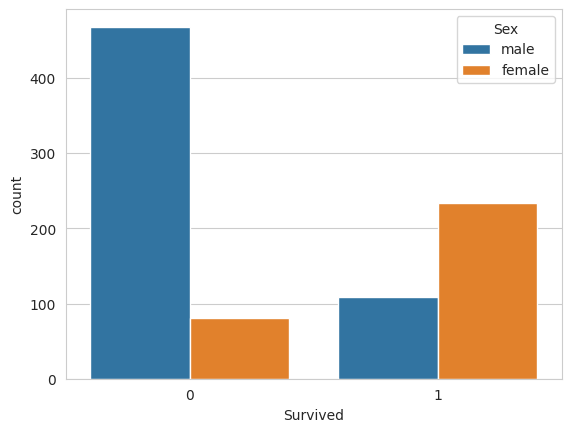

In [16]:
# Check death/survivors by sex
sns.countplot(x="Survived", hue="Sex", data=train)

<Axes: xlabel='Survived', ylabel='count'>

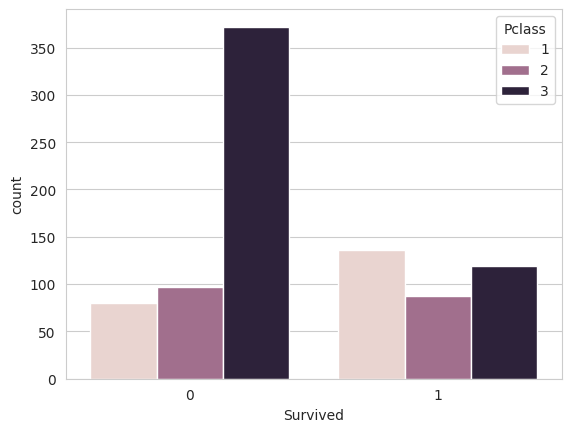

In [17]:
# Check dead/survived by passenger class
sns.countplot(x="Survived", hue="Pclass", data=train)

<Axes: xlabel='Age', ylabel='Count'>

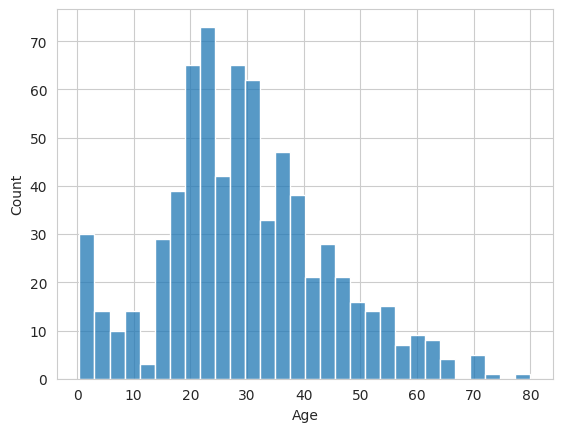

In [20]:
# Check age distribution
sns.histplot(train["Age"].dropna(), kde=False, bins=30)

<Axes: xlabel='Fare', ylabel='Count'>

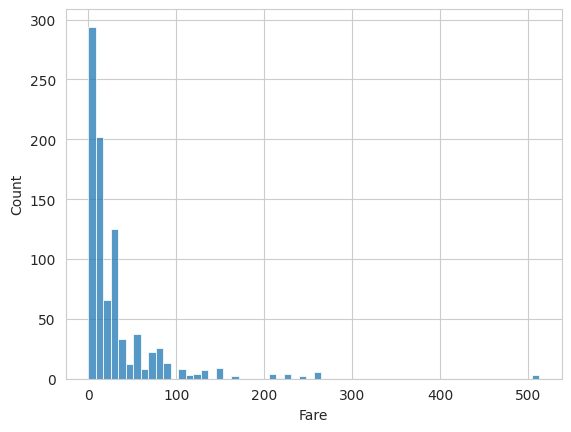

In [24]:
# Check price paid
sns.histplot(train["Fare"], kde=False, bins=60)

<Axes: xlabel='Pclass', ylabel='Age'>

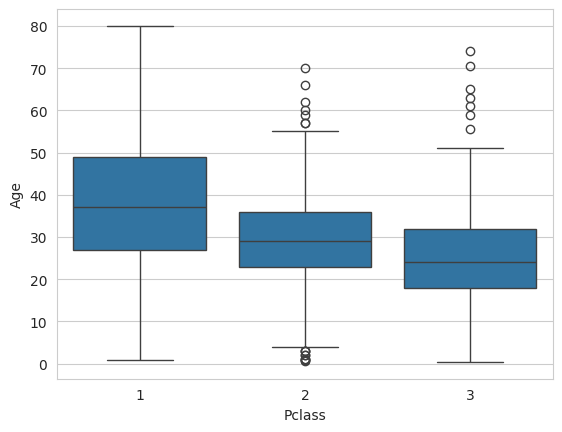

In [26]:
# Check age distribution per class
sns.boxplot(x="Pclass", y="Age", data=train)

In [53]:
def calculate_age(cols, first, second, third):
    age = cols["Age"]
    pclass = cols["Pclass"]
    if pd.isnull(age):
        if pclass == 1:
            return first
        elif pclass == 2:
            return second
        else:
            return third
    else:
        return age

def calculate_fare(cols, first, second, third):
    fare = cols["Fare"]
    pclass = cols["Pclass"]
    if pd.isnull(fare):
        if pclass == 1:
            return first
        elif pclass == 2:
            return second
        else:
            return third
    else:
        return fare

In [54]:
first_class_age = train[train["Pclass"] == 1]["Age"].mean()
first_class_fare = train[train["Pclass"] == 1]["Fare"].mean()
second_class_age = train[train["Pclass"] == 2]["Age"].mean()
second_class_fare = train[train["Pclass"] == 2]["Fare"].mean()
third_class_age = train[train["Pclass"] == 3]["Age"].mean()
third_class_fare = train[train["Pclass"] == 3]["Fare"].mean()


age_args = {"first": first_class_age, "second": second_class_age, "third": third_class_age}
fare_args = {"first": first_class_fare, "second": second_class_fare, "third": third_class_fare}
train["Age"] = train[["Age", "Pclass"]].apply(calculate_age, axis=1, **age_args)
test["Age"] = test[["Age", "Pclass"]].apply(calculate_age, axis=1, **age_args)
test["Fare"] = test[["Fare", "Pclass"]].apply(calculate_fare, axis=1, **fare_args)

<Axes: >

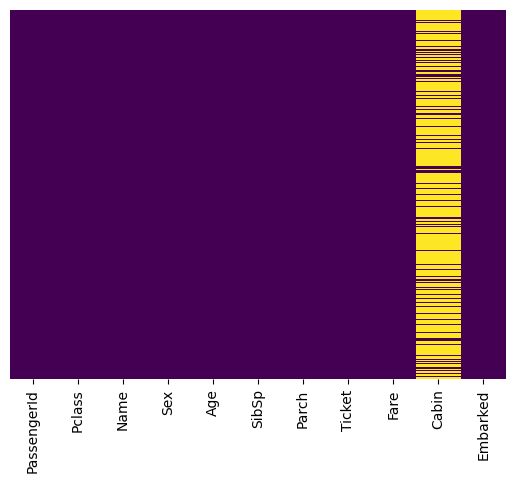

In [147]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [55]:
# Drop Cabin as there is too much info missing, and drop the person who didn't embark
train.drop("Cabin", axis=1, inplace=True)
train.dropna(inplace=True)
test.drop("Cabin", axis=1, inplace=True)
# test.dropna(inplace=True)


In [56]:
# Convert male or female to 1 or 0
sex = pd.get_dummies(train["Sex"], drop_first=True).astype(int)
embark = pd.get_dummies(train["Embarked"], drop_first=True).astype(int)
sex1 = pd.get_dummies(test["Sex"], drop_first=True).astype(int)
embark1 = pd.get_dummies(test["Embarked"], drop_first=True).astype(int)


In [57]:
train = pd.concat([train, sex, embark], axis=1)
test = pd.concat([test, sex1, embark1], axis=1)

In [58]:
# Drop Sex, and Embark, Name and Ticket
train.drop(["Sex", "Embarked", "Name"], axis=1, inplace=True)
test.drop(["Sex", "Embarked", "Name"], axis=1, inplace=True)

In [59]:
train.drop("PassengerId", axis=1)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,0,3,22.00000,1,0,21171,7.2500,1,0,1
1,1,1,38.00000,1,0,17599,71.2833,0,0,0
2,1,3,26.00000,0,0,3101282,7.9250,0,0,1
3,1,1,35.00000,1,0,113803,53.1000,0,0,1
4,0,3,35.00000,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,211536,13.0000,1,0,1
887,1,1,19.00000,0,0,112053,30.0000,0,0,1
888,0,3,25.14062,1,2,6607,23.4500,0,0,1
889,1,1,26.00000,0,0,111369,30.0000,1,0,0


In [60]:
# Create the models
y = train["Survived"]
x = train.drop("Survived", axis=1)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [63]:
from sklearn.linear_model import LogisticRegression

In [70]:
logmodel = LogisticRegression(max_iter=12000)

In [47]:
print(y_train)

691    1
273    0
670    1
551    0
426    1
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 533, dtype: int64


In [71]:
model = logmodel.fit(x_train, y_train)

In [72]:
prediction = model.predict(x_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       216
           1       0.78      0.67      0.72       140

    accuracy                           0.79       356
   macro avg       0.79      0.77      0.78       356
weighted avg       0.79      0.79      0.79       356

[[189  27]
 [ 46  94]]


In [75]:
model.score(x_train, y_train)

0.8067542213883677

In [76]:
model.score(x_test, y_test)

0.7949438202247191

In [77]:
test["Survived"] = model.predict(test)

In [78]:
submission = test[["PassengerId", "Survived"]]

In [160]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [167]:
submission.to_csv("submission_ln.csv", index=False)

In [162]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,892,3,34.50000,0,0,7.8292,1,1,0,0
1,893,3,47.00000,1,0,7.0000,0,0,1,0
2,894,2,62.00000,0,0,9.6875,1,1,0,0
3,895,3,27.00000,0,0,8.6625,1,0,1,0
4,896,3,22.00000,1,1,12.2875,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,25.14062,0,0,8.0500,1,0,1,0
414,1306,1,39.00000,0,0,108.9000,0,0,0,1
415,1307,3,38.50000,0,0,7.2500,1,0,1,0
416,1308,3,25.14062,0,0,8.0500,1,0,1,0
